# Quantifying Playing-Style Similarity Among NBA Teams Using Cosine Similarity


## Abstract

This report applies cosine similarity to per-game statistics of all NBA teams to quantify how similar their playing styles are. Data were loaded from a structured dataset, normalized, and used to compute a pairwise similarity matrix. Results are presented as a matrix and a heat map. The method successfully distinguishes teams by their statistical profiles and is consistent with the hypothesis that teams can be grouped by style using vector similarity.

---

## 1. Observation and Question

NBA teams are often described in terms of "playing style"—e.g., pace, emphasis on three-point shooting, or defensive aggression. These descriptions are qualitative. A natural question is whether such styles can be quantified and compared across all teams using publicly available statistics.

**Question:** Can we measure how similar two teams' playing styles are by comparing their per-game statistics, and can we do so in a consistent, reproducible way?

## 2. Background / Research

**Cosine similarity** is a standard measure in data science and information retrieval for comparing two vectors. For vectors **A** and **B**, it is defined as the cosine of the angle between them:

$$\text{similarity}(\mathbf{A}, \mathbf{B}) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|} $$

Values range from 0 (vectors are orthogonal) to 1 (identical direction). It is invariant to the magnitude of the vectors, so it emphasizes *direction* (i.e., the relative mix of statistics) rather than raw totals. That makes it suitable for comparing "profiles" of teams when statistics are on different scales. This approach is well established in clustering and similarity search; here it is applied to team-level NBA statistics.

## 3. Hypothesis

**Hypothesis:** If each NBA team is represented by a vector of its per-game statistics, then the pairwise cosine similarities between these vectors will (1) be well defined and numerically stable, and (2) reveal clusters of teams with similar statistical profiles, consistent with the notion of distinct "playing styles."

---

## 4. Methods

### 4.1 Software and data

Analysis was conducted in Python using `pandas` (data handling), `numpy` (numerical computation), and `matplotlib`/`seaborn` (visualization). The dataset was obtained from a structured export (e.g., Google Sheets or Sports Reference) and stored as a CSV file. The path to this file is set below; the "League Average" row, if present, was excluded so that only individual teams are compared. The scripts used to compute the vectors and similarity matrix (e.g., from raw stats) are available in the project’s GitHub repository for anyone who wants to see the full pipeline.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Input data: CSV with "Team" column + per-game stat columns (export from Google Sheet or Sports Reference).
# Put that file in the same folder as this notebook and set its name below; or use a full path, e.g.:
#   CSV_PATH = r"C:\Users\YourName\Downloads\sportsref_download.csv"
CSV_PATH = "sportsref_download(Worksheet).csv"

In [8]:
try:
    df = pd.read_csv(CSV_PATH)
except FileNotFoundError:
    raise FileNotFoundError(f"CSV not found: {CSV_PATH}. Export your Google Sheet as CSV and save it here (or update CSV_PATH).")

df = df[df['Team'] != 'League Average'].reset_index(drop=True)

print(f"Loaded {len(df)} teams. Stat columns: {list(df.drop('Team', axis=1).columns)}")
df.head()

Loaded 30 teams. Stat columns: ['3PA', '2PA', 'ORB', 'DRB', 'STL', 'TOV', 'AST', 'FTA', 'PF']


,Team,3PA,2PA,ORB,DRB,STL,TOV,AST,FTA,PF
0,Cleveland Cavaliers*,41.5,49.3,11.2,34.2,8.2,13.2,28.1,21.9,18.1
1,Memphis Grizzlies*,37.9,55.5,12.9,34.4,8.9,15.7,28.4,23.3,20.9
2,Denver Nuggets*,31.9,57.8,11.2,34.5,8.0,14.3,31.0,23.3,17.6
3,Oklahoma City Thunder*,38.8,53.9,10.6,34.2,10.3,11.7,26.9,20.4,19.9
4,Atlanta Hawks,37.7,54.1,11.9,32.6,9.7,15.5,29.6,23.2,19.1


### 4.2 Procedure

Each team was represented by a vector of its per-game statistics (all numeric columns except the team identifier). Row vectors were normalized to unit length (L2 norm). The pairwise cosine similarity matrix was then computed as the matrix product of the normalized data matrix with its transpose, yielding one similarity value for each pair of teams. The result is a symmetric matrix with diagonal entries 1.0; off-diagonal entries lie in [0, 1] and indicate how similar two teams' stat profiles are.

In [9]:
def cosine_similarity_matrix(X):
    """Compute pairwise cosine similarity. X: (n_teams, n_stats)."""
    X_norm = X / np.linalg.norm(X, axis=1, keepdims=True)
    return np.dot(X_norm, X_norm.T)

teams = df['Team'].values
stats = df.drop('Team', axis=1).values.astype(float)

similarity_matrix = cosine_similarity_matrix(stats)
similarity_df = pd.DataFrame(similarity_matrix, index=teams, columns=teams).round(4)

---

## 5. Results

### Table 1 — Full similarity matrix

The table below is the **pairwise cosine similarity matrix**: each row and column is a team, and each cell is the similarity score (0 to 1) between that row team and that column team. The diagonal is always 1.0 (each team vs. itself); values near 1.0 elsewhere mean those two teams have very similar stat profiles.

In [10]:
similarity_df

,Cleveland Cavaliers*,Memphis Grizzlies*,Denver Nuggets*,Oklahoma City Thunder*,Atlanta Hawks,Chicago Bulls,Indiana Pacers*,Boston Celtics*,New York Knicks*,Sacramento Kings,...,Utah Jazz,Toronto Raptors,Portland Trail Blazers,Miami Heat*,New Orleans Pelicans,Philadelphia 76ers,Washington Wizards,Orlando Magic*,Charlotte Hornets,Brooklyn Nets
Cleveland Cavaliers*,1.0000,0.9964,0.9888,0.9972,0.9968,0.9992,0.9959,0.9920,0.9934,0.9948,...,0.9980,0.9912,0.9956,0.9986,0.9933,0.9964,0.9981,0.9951,0.9975,0.9980
Memphis Grizzlies*,0.9964,1.0000,0.9960,0.9981,0.9995,0.9951,0.9986,0.9785,0.9984,0.9991,...,0.9971,0.9985,0.9988,0.9976,0.9991,0.9982,0.9984,0.9989,0.9985,0.9966
Denver Nuggets*,0.9888,0.9960,1.0000,0.9932,0.9961,0.9882,0.9974,0.9626,0.9984,0.9974,...,0.9884,0.9977,0.9920,0.9935,0.9972,0.9911,0.9908,0.9927,0.9912,0.9862
Oklahoma City Thunder*,0.9972,0.9981,0.9932,1.0000,0.9977,0.9963,0.9983,0.9825,0.9974,0.9983,...,0.9949,0.9959,0.9966,0.9981,0.9971,0.9977,0.9978,0.9972,0.9976,0.9958
Atlanta Hawks,0.9968,0.9995,0.9961,0.9977,1.0000,0.9956,0.9990,0.9794,0.9984,0.9984,...,0.9966,0.9977,0.9978,0.9979,0.9985,0.9979,0.9977,0.9979,0.9975,0.9963
Chicago Bulls,0.9992,0.9951,0.9882,0.9963,0.9956,1.0000,0.9954,0.9918,0.9927,0.9940,...,0.9973,0.9904,0.9939,0.9987,0.9919,0.9941,0.9978,0.9927,0.9972,0.9968
Indiana Pacers*,0.9959,0.9986,0.9974,0.9983,0.9990,0.9954,1.0000,0.9772,0.9990,0.9990,...,0.9944,0.9978,0.9957,0.9979,0.9981,0.9966,0.9968,0.9966,0.9962,0.9943
Boston Celtics*,0.9920,0.9785,0.9626,0.9825,0.9794,0.9918,0.9772,1.0000,0.9721,0.9750,...,0.9880,0.9678,0.9802,0.9861,0.9721,0.9816,0.9861,0.9776,0.9851,0.9889
New York Knicks*,0.9934,0.9984,0.9984,0.9974,0.9984,0.9927,0.9990,0.9721,1.0000,0.9995,...,0.9927,0.9988,0.9963,0.9968,0.9994,0.9959,0.9955,0.9962,0.9959,0.9917
Sacramento Kings,0.9948,0.9991,0.9974,0.9983,0.9984,0.9940,0.9990,0.9750,0.9995,1.0000,...,0.9946,0.9989,0.9974,0.9974,0.9994,0.9971,0.9972,0.9977,0.9974,0.9938


### Figure 1 — Heat map

The same matrix is shown as a heat map below; color indicates similarity (darker red = higher similarity, easier to spot clusters).

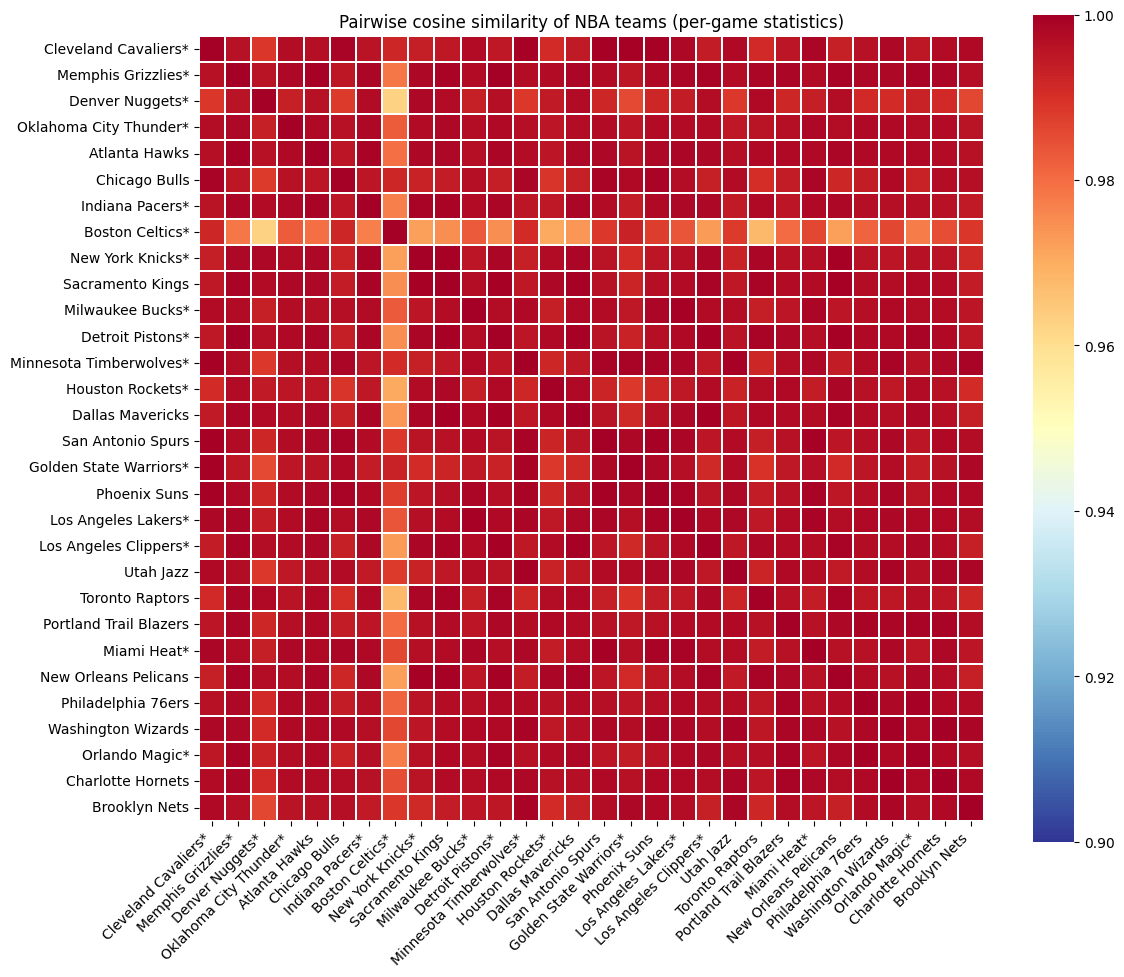

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, cmap='RdYlBu_r', vmin=0.9, vmax=1.0, square=True, 
            xticklabels=True, yticklabels=True, linewidths=0.1)
plt.title("Pairwise cosine similarity of NBA teams (per-game statistics)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---

## 6. Discussion

The similarity matrix and heat map show that teams can be quantitatively compared by their statistical profiles. Pairs of teams with similar styles yield values close to 1.0; more divergent styles yield lower values. The method is reproducible and depends only on the choice of statistics and the time period of the data.

**Limitations:** Results depend on which statistics are included and how they are scaled. The current analysis uses all numeric columns in the dataset without additional weighting. Time (e.g., season-to-season variation) and roster changes are not accounted for; the analysis is a snapshot for the given dataset.

---

## 7. Conclusion

The hypothesis is supported: representing each NBA team as a vector of per-game statistics and computing pairwise cosine similarities yields a well-defined, interpretable similarity matrix. Teams with similar statistical profiles cluster together in the heat map, consistent with the idea of quantifiable "playing styles." This approach could be extended by varying the set of statistics, applying clustering algorithms, or incorporating multiple seasons.